In [35]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

1.0
0.5


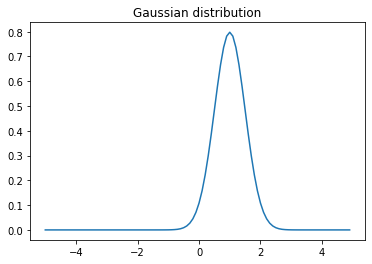

In [37]:
# set parameters
mu= 1.0
sigma=0.5
x=np.arange(-5,5,0.1)
y1=np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
plt.plot(x,y1)
plt.savefig('gaussian_distribution.png')
plt.title(f'Gaussian distribution')
s=np.random.normal(mu,sigma,1000)
print(mu)
print(sigma)
plt.savefig('gaussian_distribution.png')

In [39]:
num_data=1000
x_data=np.random.normal(mu,sigma,num_data)
x_train=x_data[1]
x_train

0.9327441348613286

In [40]:
def target_distribution(x,mu,sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

#define gradient of normal distribution
def gradient(x,mu,sigma):
    pdf=np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*(np.sqrt(2*np.pi)))
    grad_pdf_sigma = -np.exp(-(x-mu)**2/(2*sigma**2))/(sigma**2*np.sqrt(2*np.pi))+(x-mu)**2*np.exp(-(x-mu)**2/(2*sigma**2))/(sigma**4*np.sqrt(2*np.pi))
    gradient_sigma = grad_pdf_sigma/pdf
    grad_pdf_mu = ((x-mu)/sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*(np.sqrt(2*np.pi)))
    gradient_mu= grad_pdf_mu/pdf
    return gradient_mu , gradient_sigma

In [43]:
def metropolis_hastings(proposal_std, initial_state, num_samples,mu,sigma):
    #initialize,set current state to initial state
    samples=[initial_state]
    current_state=initial_state
    for i in range(num_samples):
        #calculate candidate
        candidate=np.random.normal(current_state,proposal_std)
        #acceptance ration
        a_r=target_distribution(candidate,mu,sigma)/target_distribution(current_state,mu,sigma)
        if np.random.uniform(0,1)<a_r:
            current_state=candidate
        #X'
        samples.append(current_state)
    X_dash=samples[1:]
    return X_dash

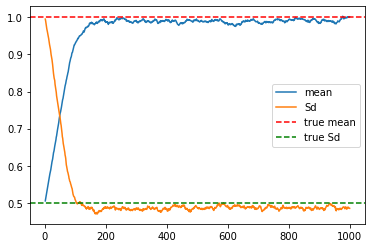

In [44]:
# 1-step Metropolis Hasting
# get the mu and sigma iteratively and plot the convergence
eta=0.01
sigma0=1
mu0=0.5
proposal_std=1
num_samples=num_data
ni=[]
mui=[]
sigmai=[]

time1 = time.time()

for i in range(1000):
    sum1_mu=0
    sum_dash_mu=0
    sum1_sigma=0
    sum_dash_sigma=0
    initial_state=x_train
    X = metropolis_hastings(proposal_std, initial_state, num_samples,mu0,sigma0)
    #calculate the sum of gradient
    for j in range(num_data):
        #gradient of log(p(x))
        sum1_mu += gradient(x_data[j],mu0,sigma0)[0]
        sum1_sigma += gradient(x_data[j],mu0,sigma0)[1]
    for k in range(num_samples):
        sum_dash_mu += gradient(X[k],mu0,sigma0)[0]
        sum_dash_sigma += gradient(X[k],mu0,sigma0)[1]
    expected1_mu = sum1_mu/num_data
    expected_dash_mu = sum_dash_mu/num_samples
    expected1_sigma = sum1_sigma/num_data
    expected_dash_sigma = sum_dash_sigma/num_samples
    sigma_i = sigma0 + eta*(expected1_sigma-expected_dash_sigma)
    mu_i = mu0 + eta*(expected1_mu-expected_dash_mu)
    n=i+1
    ni.append(n)
    mui.append(mu_i)
    sigmai.append(sigma_i)
    mu0 = mu_i
    sigma0 = sigma_i

time2 = time.time()
time_1_step = time2-time1

plt.plot(ni,mui, label='mean')
plt.plot(ni,sigmai, label='Sd')
plt.axhline(y=mu, color='r', linestyle='dashed', label='true mean')
plt.axhline(y=sigma, color='g', linestyle='dashed', label='true Sd')
plt.legend()
plt.savefig('1_step_CD_uncon_1D.png')

In [ ]:
# persistent sample contrastive divergence
# plot the convergence
eta=0.01
sigma0=1.0
mu0=0.5
proposal_std=1
num_samples=num_data
n_persistant =[]
sigma_per = []
mu_per = []
initial_state=x_train

time1 = time.time()

for i in range(1000):
    sum1_mu=0
    sum_dash_mu=0
    sum1_sigma=0
    sum_dash_sigma=0
    X = metropolis_hastings(proposal_std, initial_state, num_samples, mu0 , sigma0)
    initial_state = X[-1]
    #calculate the sum of gradient
    for j in range(num_data):
        #gradient of log(p(x))
        sum1_mu += gradient(x_data[j],mu0,sigma0)[0]
        sum1_sigma += gradient(x_data[j],mu0,sigma0)[1]
    for k in range(num_samples):
        sum_dash_mu += gradient(X[k],mu0,sigma0)[0]
        sum_dash_sigma += gradient(X[k],mu0,sigma0)[1]
    expected1_mu = sum1_mu/num_data
    expected_dash_mu = sum_dash_mu/num_samples
    expected1_sigma = sum1_sigma/num_data
    expected_dash_sigma = sum_dash_sigma/num_samples
    sigma_i = sigma0 + eta*(expected1_sigma-expected_dash_sigma)
    mu_i = mu0 + eta*(expected1_mu-expected_dash_mu)
    n=i+1
    n_persistant.append(n)
    sigma_per.append(sigma_i)
    mu_per.append(mu_i)
    mu0 = mu_i
    sigma0 = sigma_i
    x_train = X[1]

time2 = time.time()
time_persistent = time2-time1

plt.plot(n_persistant,mu_per,label='mean')
plt.plot(n_persistant,sigma_per, label='Sd')
plt.axhline(y=mu, color='r', linestyle='dashed', label='true mean')
plt.axhline(y=sigma, color='g', linestyle='dashed', label='true Sd')
plt.legend()
plt.savefig('persistent_CD_uncon_1D.png')

In [ ]:
# 3 step Metropolis Hasting
eta=0.01
sigma0=1.0
mu0=0.5
proposal_std=1
num_samples=num_data
ni=[]
mu2=[]
sigma2=[]

time1 = time.time()

for i in range(1000):
    sum1_mu=0
    sum_dash_mu=0
    sum1_sigma=0
    sum_dash_sigma=0
    initial_state=x_train
    X1 = metropolis_hastings(proposal_std, initial_state, num_samples,mu0,sigma0)
    X2 = metropolis_hastings(proposal_std, X1[-1], num_samples,mu0,sigma0)
    X = metropolis_hastings(proposal_std, X2[-1], num_samples,mu0,sigma0)
    #calculate the sum of gradient
    for j in range(num_data):
        #gradient of log(p(x))
        sum1_mu += gradient(x_data[j],mu0,sigma0)[0]
        sum1_sigma += gradient(x_data[j],mu0,sigma0)[1]
    for k in range(num_samples):
        sum_dash_mu += gradient(X[k],mu0,sigma0)[0]
        sum_dash_sigma += gradient(X[k],mu0,sigma0)[1]
    expected1_mu = sum1_mu/num_data
    expected_dash_mu = sum_dash_mu/num_samples
    expected1_sigma = sum1_sigma/num_data
    expected_dash_sigma = sum_dash_sigma/num_samples
    sigma_i = sigma0 + eta*(expected1_sigma-expected_dash_sigma)
    mu_i = mu0 + eta*(expected1_mu-expected_dash_mu)
    n=i+1
    ni.append(n)
    mu2.append(mu_i)
    sigma2.append(sigma_i)
    mu0 = mu_i
    sigma0 = sigma_i

time2 = time.time()
time_3_step = time2-time1

plt.plot(ni,mu2, label='mean')
plt.plot(ni,sigma2, label='Sd')
plt.axhline(y=mu, color='r', linestyle='dashed', label='true mean')
plt.axhline(y=sigma, color='g', linestyle='dashed', label='true Sd')
plt.legend()
plt.savefig('3_step_CD_uncon_1D.png')

In [ ]:
print('1 step MH',sigmai[150])
print('persistent MH',sigma_per[150])
print('2 step MH',sigma2[150])

In [ ]:
print('1 step MH', mui[50])
print('persistent MH', mu_per[50])
print('2 step MH', mu2[50])